<a href="https://colab.research.google.com/github/mescovedo/Exercicios-Aleat-rios/blob/main/Classificador_de_Termos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Int. Comp./Exp.1

/content/drive/My Drive/Colab Notebooks/Int. Comp./Exp.1


In [ ]:
# ANN OCR trained with Noise
# numpy/tensorflow/keras
# Matheus Escovedo da Costa 14/0155317


import numpy as np

from keras.models import Sequential
from keras.models import clone_model
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.lines as lines

import tensorflow as tf
 
import geraChar


N= 6
Nnt= 10 # Number of training noise samples for each noise level
Nnv= 15# Number of validating noise samples
NStep= 10 # Noise step

P=[]  # Pattern
T=[]  # Target
Pn=[] # Noise Pattern
fitT=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training
fitV=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training


Using TensorFlow backend.


In [ ]:
# create models with 0, 10, 20 .... 90% noisy bit
(P,T)=geraChar.geraChar()

# Creat a set of N ANNs
Models=[]
for i in range(N): # for each model    
    model = Sequential()
    model.add(Dense(32, activation="sigmoid", kernel_initializer="uniform", input_dim=63))
    model.add(Dense(16, activation="sigmoid", kernel_initializer="uniform"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    Models.append(model)
    
print("Train networks")   
Models[0].fit(P, T, epochs=250, batch_size=1, verbose=0)

Train networks


# Nova seção

In [ ]:

for i in range(1,N): # for each model
# Learn Nstep epochs Noise Chars + epochs reforcing orig. Chars.
                            
    # Mantain Models[i-1] and proceed training with noise
    Models[i].set_weights(Models[i-1].get_weights())
                            
    # test with different noise levels (at least once - range(i+1))
    for k in range(Nnt):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        Models[i].fit(Pn, T, epochs=10, batch_size=1, verbose=0)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitT[i] += incorr
         
    Pn = geraChar.gchar_ruido(P,0) # Reforce learning without noise 
    Models[i].fit(Pn, T, epochs=2, batch_size=1, verbose=0)
    (incorr,idx) = geraChar.validacao(P,Models[i])
    fitT[i] += incorr

    #print("Rede i",i,"incorr",str(np.round(fitT[i],2)))
 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
Total params: 2,576
Trainable params: 2,576
Non-trainable params: 0
_________________________________________________________________
None


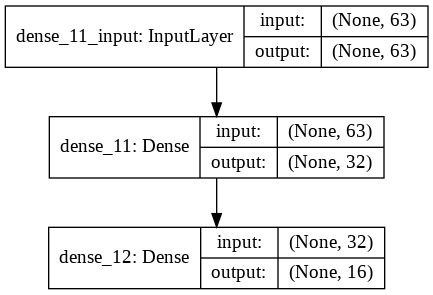

In [ ]:
print(model.summary())
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

In [ ]:
# Validate the trained ANN

fitV=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitV[i] += incorr
FitV=np.round(100*fitV/(16*Nnv),2)
print("Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ",FitV)

fitO=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[0])
        fitO[i] += incorr
FitO=np.round(100*fitO/(16*Nnv),2)
print("Test original (no noisy train) % incorrect Chars = ",FitO)



('Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ', array([ 0.  ,  6.25,  6.25, 32.5 , 31.25, 37.5 ]))
('Test original (no noisy train) % incorrect Chars = ', array([ 0.  ,  0.  ,  6.25, 25.  , 43.75, 50.  ]))


In [ ]:
rede_erro = []
for i in range(N): # for each model
    fitV=np.zeros((N),dtype=float)
    for k in range(N):
      ruido_teste=[]
      for j in range(100):
        Pn=[]
        Pn = geraChar.gchar_ruido(P,NStep*k)
        ruido_teste.append(Pn)
        (incorr,idx) = geraChar.validacao(ruido_teste[j],Models[i])
        fitV[k] += incorr
    fitV=np.round(100*fitV/(16*100),2)
    rede_erro.append(fitV)

print("Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ",rede_erro)

('Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ', [array([ 0.  ,  0.  ,  6.25, 21.19, 37.5 , 25.  ]), array([ 0.  ,  4.81,  6.25, 18.75, 43.75, 51.5 ]), array([ 0.  ,  0.  , 12.5 , 15.25, 43.75, 68.75]), array([ 0.  ,  5.56,  0.  , 18.75, 37.5 , 34.19]), array([ 0.  ,  0.  ,  0.  , 25.  , 26.31, 37.5 ]), array([ 0.  ,  6.25,  4.5 , 18.75, 37.5 , 64.56])])


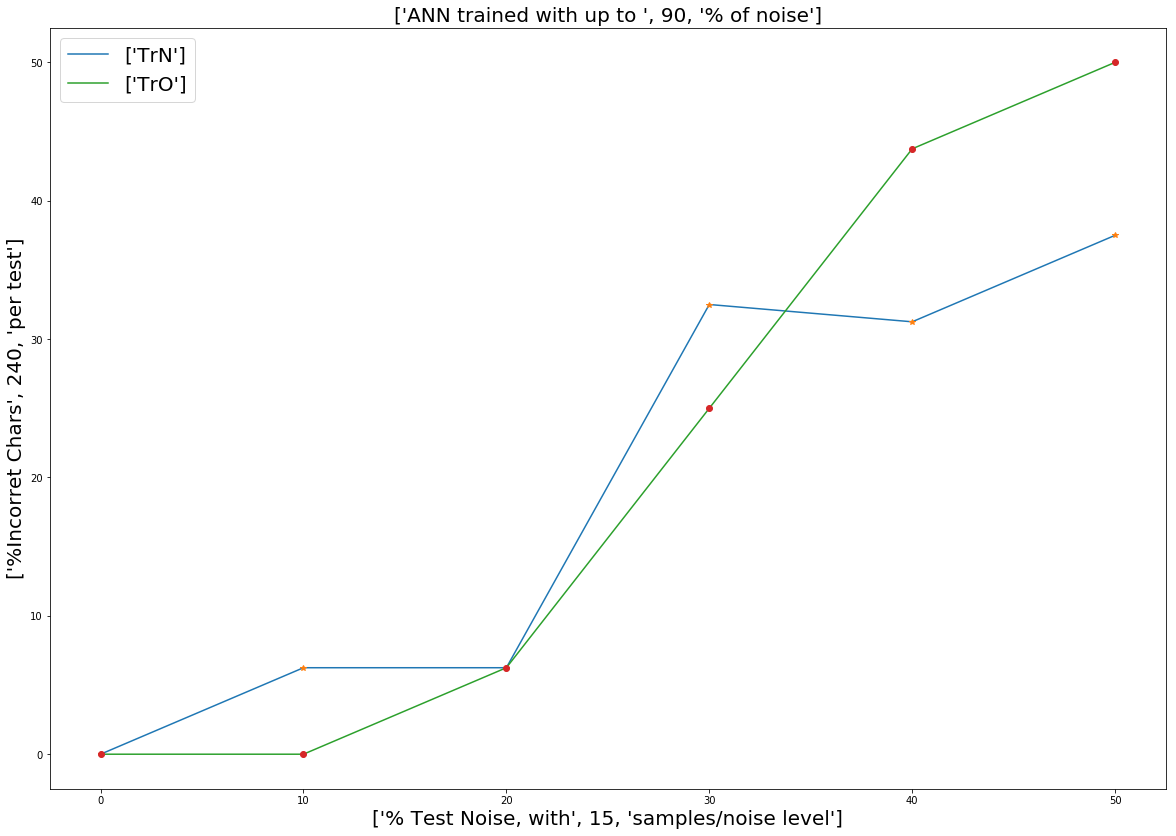

In [ ]:
plt.figure(figsize=(20,14))
 
plt.plot(range(0,NStep*N,NStep),FitV, label=['TrN'])
plt.plot(range(0,NStep*N,NStep),FitV,'*')

plt.plot(range(0,NStep*N,NStep),FitO, label=['TrO'])
plt.plot(range(0,NStep*N,NStep),FitO,'o')

plt.title(['ANN trained with up to ' ,N*Nnv,'% of noise'], fontsize=20)
plt.ylabel(["%Incorret Chars",Nnv*16,'per test'], fontsize=20)
plt.xlabel(['% Test Noise, with',Nnv,'samples/noise level'], fontsize=20)
plt.legend(loc='upper left', fontsize=20)
 
plt.savefig('figANN.pdf')
plt.show()     

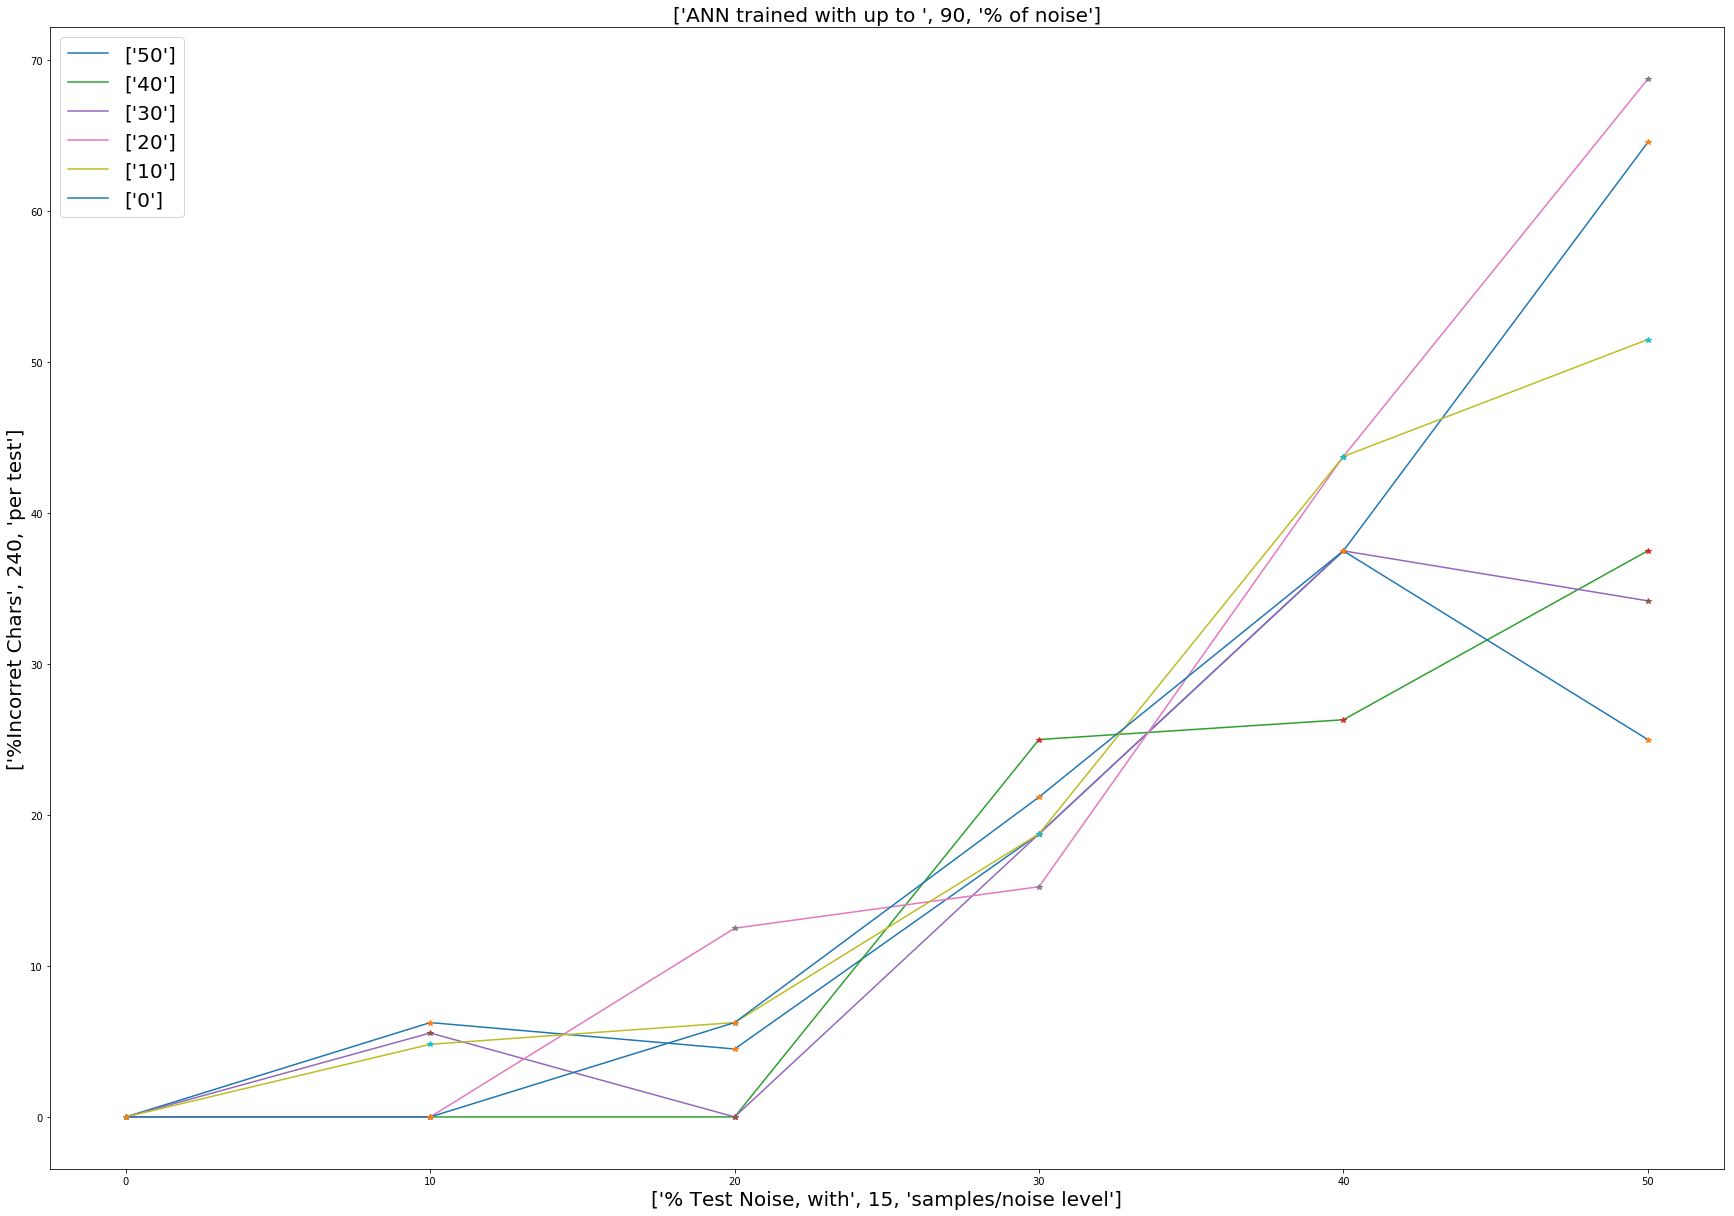

In [ ]:
plt.figure(figsize=(30,21))

plt.plot(range(0,NStep*N,NStep),rede_erro[5], label=['50'])
plt.plot(range(0,NStep*N,NStep),rede_erro[5],'*')

plt.plot(range(0,NStep*N,NStep),rede_erro[4], label=['40'])
plt.plot(range(0,NStep*N,NStep),rede_erro[4],'*')

plt.plot(range(0,NStep*N,NStep),rede_erro[3], label=['30'])
plt.plot(range(0,NStep*N,NStep),rede_erro[3],'*')

plt.plot(range(0,NStep*N,NStep),rede_erro[2], label=['20'])
plt.plot(range(0,NStep*N,NStep),rede_erro[2],'*')
 
plt.plot(range(0,NStep*N,NStep),rede_erro[1], label=['10'])
plt.plot(range(0,NStep*N,NStep),rede_erro[1],'*')

plt.plot(range(0,NStep*N,NStep),rede_erro[0], label=['0'])
plt.plot(range(0,NStep*N,NStep),rede_erro[0],'*')

#plt.plot(range(0,NStep*N,NStep),FitO, label=['TrO'])
#plt.plot(range(0,NStep*N,NStep),FitO,'o')

plt.title(['ANN trained with up to ' ,N*Nnv,'% of noise'], fontsize=20)
plt.ylabel(["%Incorret Chars",Nnv*16,'per test'], fontsize=20)
plt.xlabel(['% Test Noise, with',Nnv,'samples/noise level'], fontsize=20)
plt.legend(loc='upper left', fontsize=20)
 
plt.savefig('figANN2.pdf')
plt.show()